# Find a Legend Challenge - Starter Notebook

link:  https://xeek.ai/challenges/extract-crossplot-markers

In [1]:
### Add team name and model name here ###
team_name = 'Team Barenstark' 
model_name = 'model_1a'

## Introduction
    Througout the scientific community, a vast amount of information is contained within figures in papers, reports, and books. Without the raw data, this information can be lost altogether. We can increase our collective knowledge as a community if we develop a way to extract this information and convert it to a useful format for agregation and downstream analysis.

## Problem statement
    Plot legend
    
    The goal of this challenge is to be able to extract the plot elements from the legend into a datatable. Elements in the legend will be listed in the order they appear on the legend and will be separated by a space. 
    
    Ex:['Type A' 'Type B' 'Type C'] 

## Data description
    1. Image files containing one graph per file.
    2. CSV file containing the image file name and legend elements. These labels are to be used to train and test the model on the associated graphs.

## Shared imports

In [2]:
import os
import cv2
import json
import random as rnd
import copy
import re
import platform
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from glob import glob
from pprint import pprint

import torch
from PIL import Image

from ocr_models.preprocessing.preprocessor import Preprocessor
from ocr_models.pytesseract_eval import PytesseractEval

C:\Users\ti-he\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Dataset paths

In [3]:
DATA_ROOT = "./raw_data/helvetios_challenge_dataset_training/"
IMAGE_DATASET_PATH = f"{DATA_ROOT}/images"
LABELS_DATA_PATH = f"{DATA_ROOT}/labels" 

In [4]:
MODELS_ROOT_PATH=f"./models"
MODEL_PATH=f"{MODELS_ROOT_PATH}/{model_name}"

## Data file exploration

In [5]:
def read_image_filenames(path):
    extensions = ["*.png"]
    image_filenames = []
    for ext in extensions:
        image_filenames.extend(glob(os.path.join(path, ext)))
    return image_filenames

In [6]:
image_filenames = read_image_filenames(IMAGE_DATASET_PATH) 

In [7]:
pprint(image_filenames[0:5]) 

['./raw_data/helvetios_challenge_dataset_training//images\\20220915194538484039.png',
 './raw_data/helvetios_challenge_dataset_training//images\\20220915194540522606.png',
 './raw_data/helvetios_challenge_dataset_training//images\\20220915194541155437.png',
 './raw_data/helvetios_challenge_dataset_training//images\\20220915194541753054.png',
 './raw_data/helvetios_challenge_dataset_training//images\\20220915194542124279.png']


In [8]:
def read_label_filenames(path):
    extensions = ["*.csv"]
    label_filenames = []
    for ext in extensions:
        label_filenames.extend(glob(os.path.join(path, ext)))
    return label_filenames

In [9]:
label_filenames = read_label_filenames(LABELS_DATA_PATH) 

In [10]:
pprint(label_filenames) 

['./raw_data/helvetios_challenge_dataset_training//labels\\labels.csv']


## Import data labels

In [11]:
def import_labels (label):
    labels = pd.read_csv(label[0])
    return labels

In [12]:
labels = import_labels(label_filenames)

## Preview data
    Here are the first 5 examples of the labels. Each row corresponds to a different graph.

In [13]:
pprint(labels.head())

                sample_name                           legend
0  20220915194538484039.png                              NaN
1  20220915194540522606.png               ['DC' 'mode' 'HI']
2  20220915194541155437.png                    ['KY' 'user']
3  20220915194541753054.png             ['B' 'hat' 'AZ' 'C']
4  20220915194542124279.png  ['ALSK' 'LA' 'Limestone' 'DEL']


## Image import

In [14]:
def read_image(image_filenames):
    image = cv2.imread(image_filenames) 
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

## Preview selected images

In [15]:
def preview_images(image_filenames):
    figsize=(20,20)
    nrows = len(image_filenames)
    ncols = 1
    fig, (axes) = plt.subplots(nrows, ncols, figsize=figsize, dpi=120)

    for i in range(nrows):
        img_filename = image_filenames[i]
        image = read_image(img_filename)

        axis = axes[i] if nrows > 1 else axes
        axis.imshow(image)

        title = os.path.basename(img_filename)
        axis.set_title(title)

    plt.show()

In [16]:
PREVIEW_IMAGES_COUNT=5
rnd.seed(101)
preview_image_filenames=rnd.sample(image_filenames, k=PREVIEW_IMAGES_COUNT)
pprint(preview_image_filenames)

['./raw_data/helvetios_challenge_dataset_training//images\\20220915195213265094.png',
 './raw_data/helvetios_challenge_dataset_training//images\\20220915194725948124.png',
 './raw_data/helvetios_challenge_dataset_training//images\\20220915195133494139.png',
 './raw_data/helvetios_challenge_dataset_training//images\\20220915194913546759.png',
 './raw_data/helvetios_challenge_dataset_training//images\\20220915195033918368.png']


One way to tackle this problem is to consider the coordinates of the image elements. Here are the first 5 graphs as an example. Each graph is saved as separate png file.

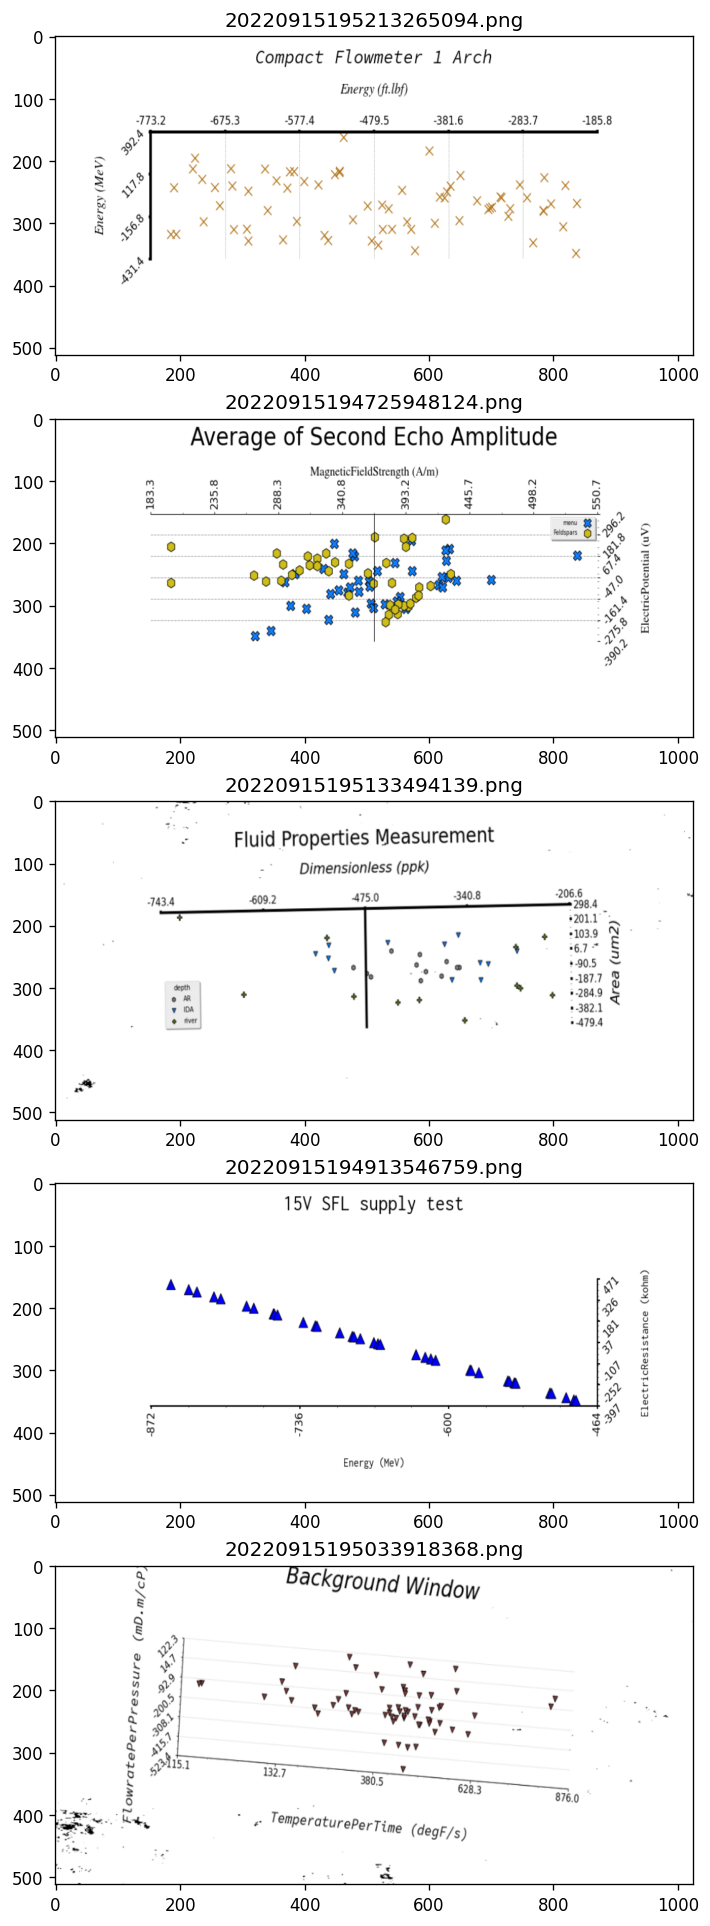

In [17]:
preview_images(preview_image_filenames) 

## Potential pipeline code
    The following code can be used to create your model pipeline. These functions outline suggested steps to help create the model. These functions are suggestions and you may change or edit as you see fit to create the desired functionality.


## Data processing

In [18]:
###

## Dataset split

In [19]:
###

## Model train

In [20]:
###

## Model test

In [21]:
###

## Model inference

In [22]:
###
    

YOLOv5  v7.0-9-gf9ca365 Python-3.10.8 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


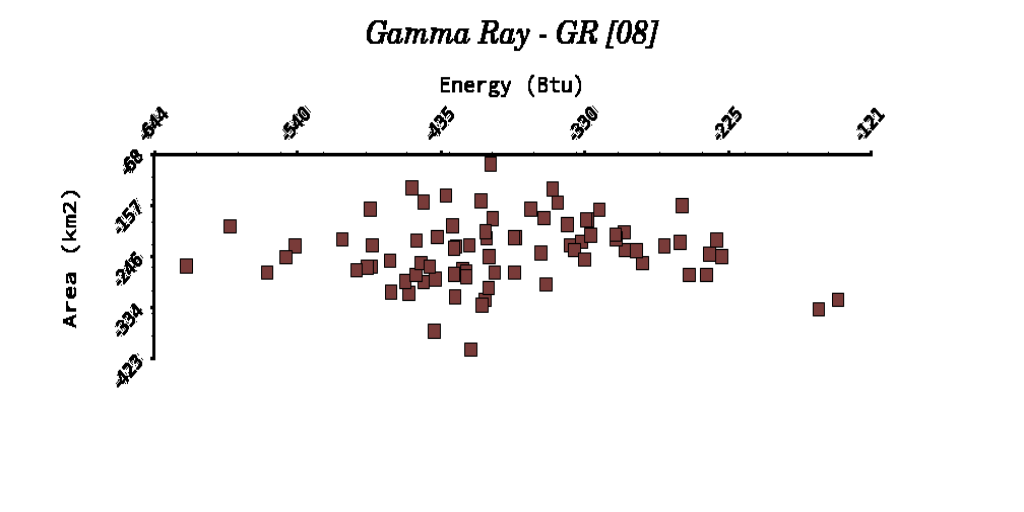

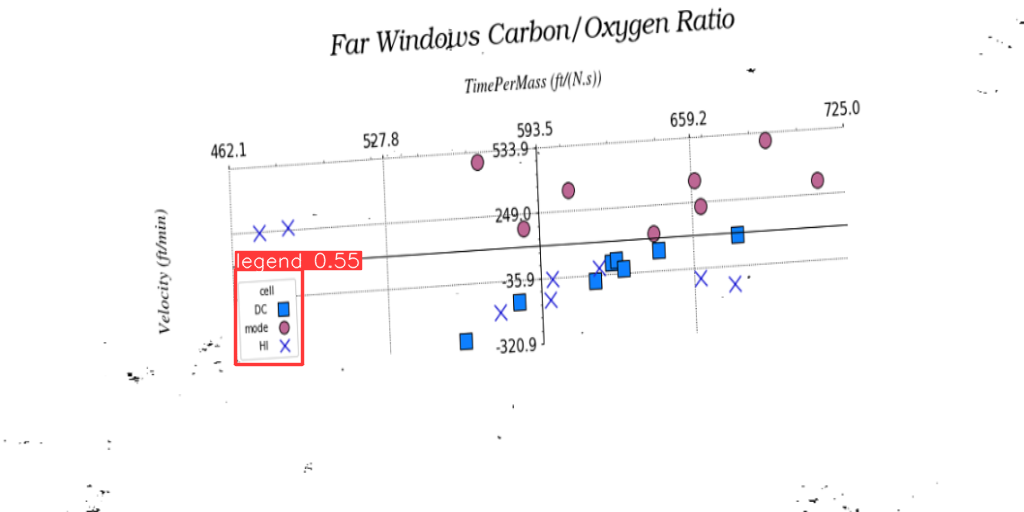

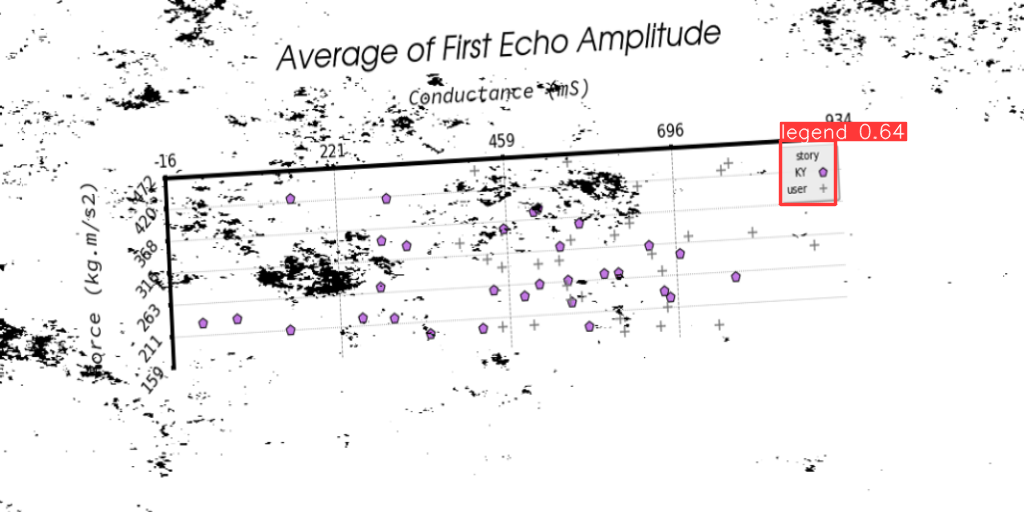

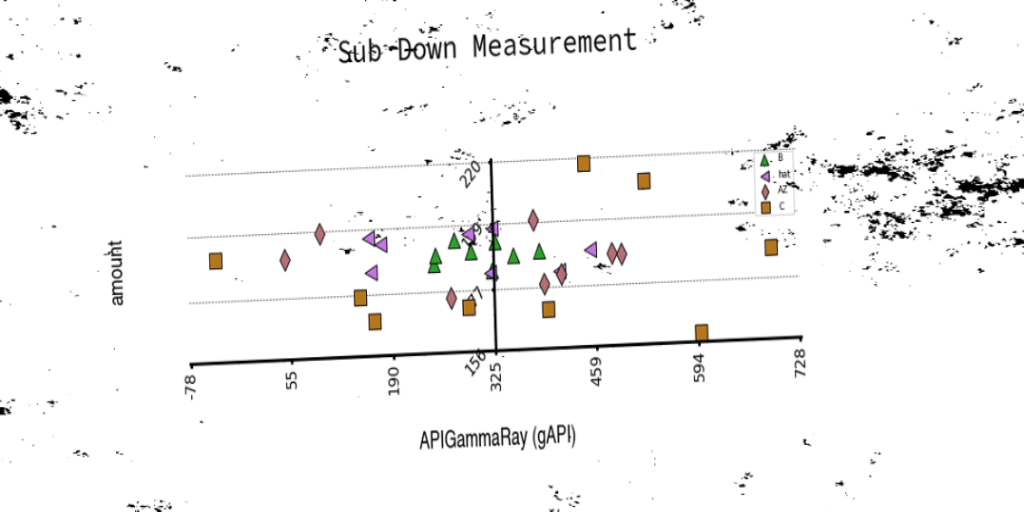

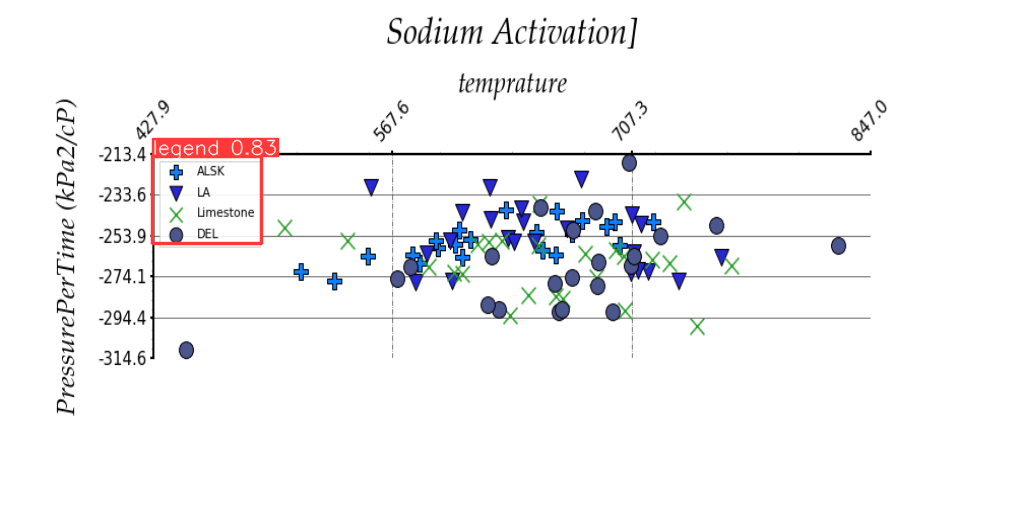

In [23]:
model = torch.hub.load('../yolov5/', 'custom', path='best.pt', source='local')

im = r'raw_data\helvetios_challenge_dataset_training\images\*.png'  
im = glob(im)[:5]

results = model(im)
results.show()

## Submission inference pipeline

    Model generated predicted_legend will be compared to known values. Results will be evaluated based on the inference time, levenshtein distance, and F1 score of the model predictions. If you modified the inputs/outputs of previously listed functions, correct the following pipeline so it can handle images unknown to the user. 
    
    The function needs to produce a CSV file containing the columns "sample_name" and "legend".
    
    The pip freeze print can be used to help make the environment requirements file (requirements.txt).

In [24]:
from time import perf_counter

In [25]:
TEST_DATA_ROOT = "raw_data/helvetios_challenge_dataset_test"
TEST_IMAGE_DATASET_PATH = f"{TEST_DATA_ROOT}/images"
TEST_LABELS_DATA_PATH = f"{TEST_DATA_ROOT}/labels"
TEST_INFERENCE_RESULTS_PATH = f"results"

In [32]:
def run_inference_pipeline(TEST_IMAGE_DATASET_PATH, TEST_INFERENCE_RESULTS_PATH, MODEL_PATH):
   
   print("Runing inference with parameters:")
   print(f"* OS                          : {platform.system()}, {platform.release()}")
   python_version = str(sys.version).replace('\n', ' ')
   print(f"* Python version              : {python_version}")
   # print("\n-- pip freeze start ---")
   # !pip freeze
   # print("-- pip freeze end ---")

   os.makedirs(TEST_INFERENCE_RESULTS_PATH, exist_ok=True)
         
   ts_start = perf_counter()
   
   model = torch.hub.load('../yolov5/', 'custom', path='best.pt', source='local')
   preprocessor = Preprocessor(deskew=True)
   tesseract = PytesseractEval(confidence=15, preprocessor=preprocessor)

   imgs = TEST_IMAGE_DATASET_PATH + r'/*.png'  
   imgs = list(glob(imgs))

   results = []
   sample_names = []

   for img in imgs:
      legend = model(img)
      legend = legend.crop()
      if len(legend) == 0:
         results.append(np.nan)
      else:
         legend = legend[0]['im']
         prediction = tesseract.predict(legend)
         prediction_str = "["
         for word in prediction: prediction_str += f"'{word}' "
         prediction_str = prediction_str.strip()
         prediction_str += "]"
         results.append(prediction_str)
      sample_names.append(img.split("\\")[1])
   
   ts_after_test = perf_counter()
   
   print(f"Inference time: {ts_after_test-ts_start:.2f} sec.")
   
   inference_results = {'sample_name': sample_names,
                        'legend': results}
   inference_results_df = pd.DataFrame(inference_results)
      
   inference_results_df.to_csv(f"{TEST_INFERENCE_RESULTS_PATH}/{team_name}_{model_name}_results.csv", index = False)
   
   print(inference_results_df)

   print(f"The submission file   : {TEST_INFERENCE_RESULTS_PATH}/{team_name}_{model_name}_results.csv")
    


In [33]:
run_inference_pipeline(
   TEST_IMAGE_DATASET_PATH,     
   TEST_INFERENCE_RESULTS_PATH, 
   "")

YOLOv5  v7.0-9-gf9ca365 Python-3.10.8 torch-1.13.0+cpu CPU



Runing inference with parameters:
* OS                          : Windows, 10
* Python version              : 3.10.8 (tags/v3.10.8:aaaf517, Oct 11 2022, 16:50:30) [MSC v.1933 64 bit (AMD64)]


Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
Saved 1 image to runs\detect\exp939
Saved results to runs\detect\exp939

Saved 1 image to runs\detect\exp940
Saved results to runs\detect\exp940

Saved 1 image to runs\detect\exp941
Saved results to runs\detect\exp941

Saved 1 image to runs\detect\exp942
Saved results to runs\detect\exp942

Saved 1 image to runs\detect\exp943
Saved results to runs\detect\exp943

Saved 1 image to runs\detect\exp944
Saved results to runs\detect\exp944

Saved 1 image to runs\detect\exp945
Saved results to runs\detect\exp945

Saved 1 image to runs\detect\exp946
Saved results to runs\detect\exp946

Saved 1 image to runs\detect\exp947
Saved results to runs\detect\exp947

Saved 1 image to runs\detect\exp948
Saved results to runs\detect\exp948

Saved 1 image to runs\detect\exp949
Saved results to runs\detect\exp949

Saved 1 image to runs\detect\exp950
Saved results to runs\detect\exp950

Saved 1 image

Inference time: 247.25 sec.
                  sample_name                                      legend
0    20220915195651573677.png       ['drt' 'qn' '©' 'deo' 'RE' '@' 'ber']
1    20220915195652176684.png                                         NaN
2    20220915195652713648.png                           ['Mobility' 'ae']
3    20220915195653681519.png                                     ['exe']
4    20220915195654121931.png                                         NaN
..                        ...                                         ...
295  20220915195931225632.png                     ['area' 'ad' 'IDA' 'x']
296  20220915195931982187.png                                          []
297  20220915195932679590.png                                     ['ge.']
298  20220915195933359877.png         ['MeV' 'Output' '(bar/m)' '&' 'x”']
299  20220915195934085444.png  ['ME' '@' 'power' '@' 'Titanium' '©' 'ax']

[300 rows x 2 columns]
The submission file   : results/Team Barenstark_model_1a_res

## Submission

Upload the inference results CSV file under the challenge on http://xeek.ai/ to score your model and update the leaderboard. Finalist will be invited to submit their notebook for final review and scoring.